# Análise de Mídias Sociais - Usando Scrapy (Facebook - 2017) 

## Scrapy

In [12]:
from bs4 import BeautifulSoup
import requests
def scrapy_facebook_likes(name_page):
    
    dict_dimensao_dados = {
        'mi': 1000000, # milhao
        'mil': 1000
    }
    
    url = 'https://www.facebook.com/pg/' + name_page + '/community/?ref=page_internal'
    
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "lxml") # "html") "lxml"
    total_curtidas = soup.find('div', attrs={'class': '_3xom'})
    
    total_curtidas_str = ''.join(total_curtidas.contents)
    total_curtidas_str  = total_curtidas_str.replace('\xa0', ' ')
    total_curtidas_str  = total_curtidas_str.replace(',','.')
    likes, dimensao = total_curtidas_str.split() # mi - milhoes, mil = 1000
    likes = float(likes)
    dimensao = dict_dimensao_dados[dimensao]
     
    return(likes, dimensao)

name_page = 'cocacolabr'
likes, dimensao = scrapy_facebook_likes(name_page)
print(likes*dimensao)

105000000.0


In [ ]:
# 105000000.0

In [13]:
import pandas as pd
def analyze_facebook_likes(names):
    
    df = pd.DataFrame(columns=['name','likes'])
    i = 0
    for name in names:   
        likes, dimensao = scrapy_facebook_likes(name)
        likes = likes * dimensao  
        df.loc[i] = {
         "name": name,
         "likes": likes,
          } 
        i = i + 1
        #print(dfdivas)        
    return df

divas = ['TaylorSwift', 'katyperry', 'beyonce', 'rihanna', 'ladygaga']
df = analyze_facebook_likes(divas)
df.sort_values('likes')

AttributeError: 'NoneType' object has no attribute 'contents'

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
def plot_data(df):
    title = "Facebook - Likes em Milhões - " +  datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=20)
    ax = sns.barplot(y='name',x='likes', data = df, palette="RdBu_r")
    #ax.set_title(title)
    #fig = plt.figure(1111)
    #fig.suptitle('Facebook - Likes em Milhões - Setembro 2017', fontsize=20)
    ax.set_xlabel('Likes (Milhões)', fontsize=16)
    ax.set_ylabel('Nome', fontsize=16)
    #ax.figure()
    #print ("Facebook - Likes em Milhões - " +  datetime.datetime.now().strftime('%Y-%m-%d  %H:%M:%S'))
    plt.show()

### API facebook-sdk
Na Api do facebook você pode accesar alguns dados (ela está cada vez mais restrita).<br />
Você precisa criar um token de acesso, para ter direito a acessar a API do facebook. <br />
Acesse https://developers.facebook.com/tools/explorer/ para criar o seu token de acesso.<br />
Exemplo de token<br />
token = "EAACEdEose0cBAOL7ncuPpluMIvn1gdM6jT1KdgIKR7KQqnkD5Ikt1YZCOZBnFlej9ECVgwV4azdvO7omFJXjTakPZAa6oIvUX45mAMSYGMCMn9gi6Nol8w6bUkFNXtwu1RLCT2LkucQPsC1lc7vDxoXXvnZAb3IL1PsLSragmvkQcdrkcoLdQTKKyBCzWhoZD"

## Facebook - Coca-Cola X Pepsi

In [15]:
produtos = ['cocacolabr', 'pepsi']

df = analyze_facebook_likes(produtos)
df.sort_values('likes')

,name,likes
1,pepsi,37000000.0
0,cocacolabr,105000000.0


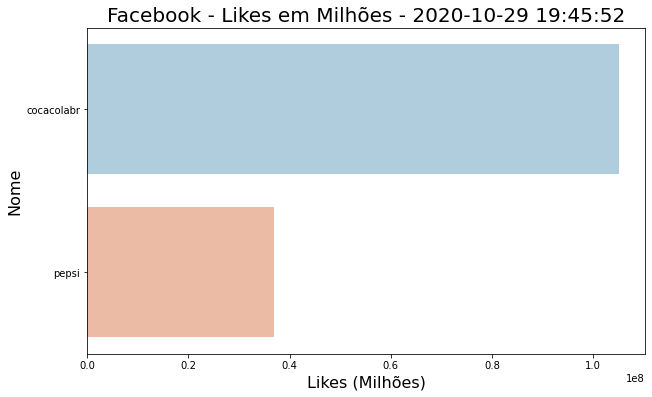

In [16]:
plot_data(df)

## Análise de Mídias Sociais (facebook) - Celebridades Divas Internacionais

In [17]:
import pandas as pd
divas = ['TaylorSwift', 'katyperry', 'beyonce', 'rihanna', 'ladygaga']
df = analyze_facebook_likes(divas)
# sort by likes
df2 = df.sort_values('likes')
df2

AttributeError: 'NoneType' object has no attribute 'contents'

## Nomalizar os dados para mesma escala

In [ ]:
# normalyze Data
df3 = df2
milion = 1000000
desred_decimals = 2    
df3['likes'] = df3.likes.apply(lambda x: round(x/milion,desred_decimals))
print ("likes em Milhões")
df3

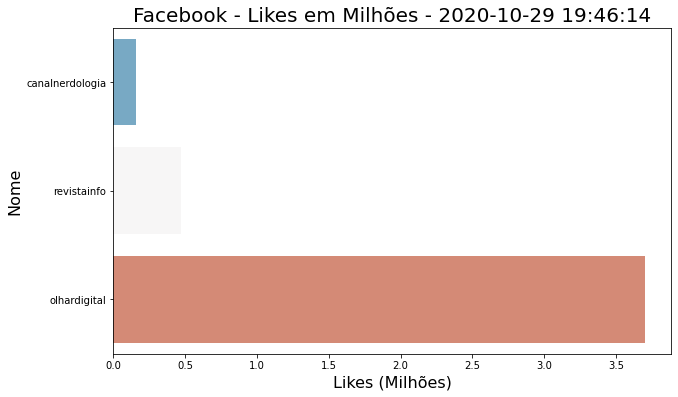

In [18]:
plot_data(df3)

## Análise de Mídias Sociais (facebook) - Celebridades Brasileiras

In [8]:
names_facebook = ['WesleySafadao', 'whinderssonnunesoficial', 'mariliamendoncaoficial', '5incominutos']
df = analyze_facebook_likes(names_facebook)
# sort by likes
# sort by likespage
df2 = df.sort_values('likes')
df2

AttributeError: 'NoneType' object has no attribute 'contents'

### Normalizar os dados para a mesma escala

In [ ]:
# normalyze Data
df3 = df2
milion = 1000000
desred_decimals = 2    
df3.likes = df3.likes.apply(lambda x: round(x/milion,desred_decimals))

print ("Likes em Milhões")
df3

In [ ]:
plot_data(df3)

## Análise de Mídias Sociais (facebook) - Mais análises

In [19]:
names_facebook = [ 'olhardigital', 'revistainfo', 'canalnerdologia']
#names_facebook = [ name.lower() for name in names_facebook]
df = analyze_facebook_likes(names_facebook)
# sort by likes
# sort by likespage
df2 = df.sort_values('likes')
df2

,name,likes
2,canalnerdologia,163000.0
1,revistainfo,469000.0
0,olhardigital,3700000.0


In [20]:
# normalyze Data
df3 = df2
milion = 1000000
desred_decimals = 2    
df3.likes = df3.likes.apply(lambda x: round(x/milion,desred_decimals))

print ("Likes em Milhões")
df3

Likes em Milhões


,name,likes
2,canalnerdologia,0.16
1,revistainfo,0.47
0,olhardigital,3.70


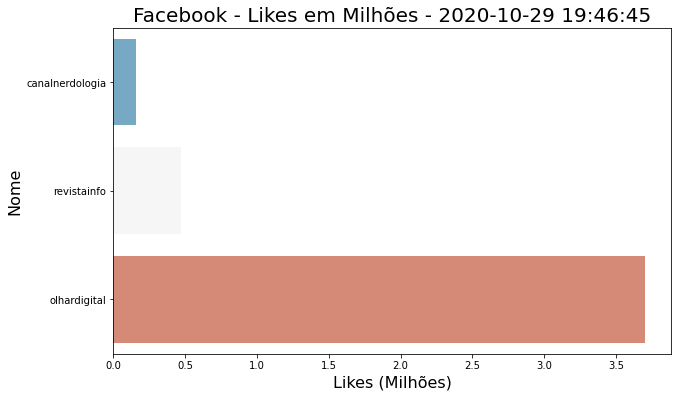

In [21]:
plot_data(df2)